## DETECCIÓN Y EXPLORACIÓN DE DATOS FALTANTES

1. Importar las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

2. Lectura del archivo

In [2]:
data=pd.read_csv('C:/Users/WAGNER FERNÁNDEZ/OneDrive - POLICIA NACIONAL DE COLOMBIA/Documents/Ciencia de Datos/PROYECTOS/DETECCION-EXPLORACION-DATOS FALTANTES/raw/offers.csv')
data

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
...,...,...,...,...,...,...,...,...,...
6125,NaN,Corporate Events,Closed Lost,2019-05-20,2019-05-21,120.0,NaN,operations,price
6126,NaN,Wedding Planning,Closed Won,2019-05-20,2019-05-20,NaN,NaN,NaN,NaN
6127,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,NaN,operations,no product fit


3. Graficar los datos faltantes

Mediante matriz de nulidad

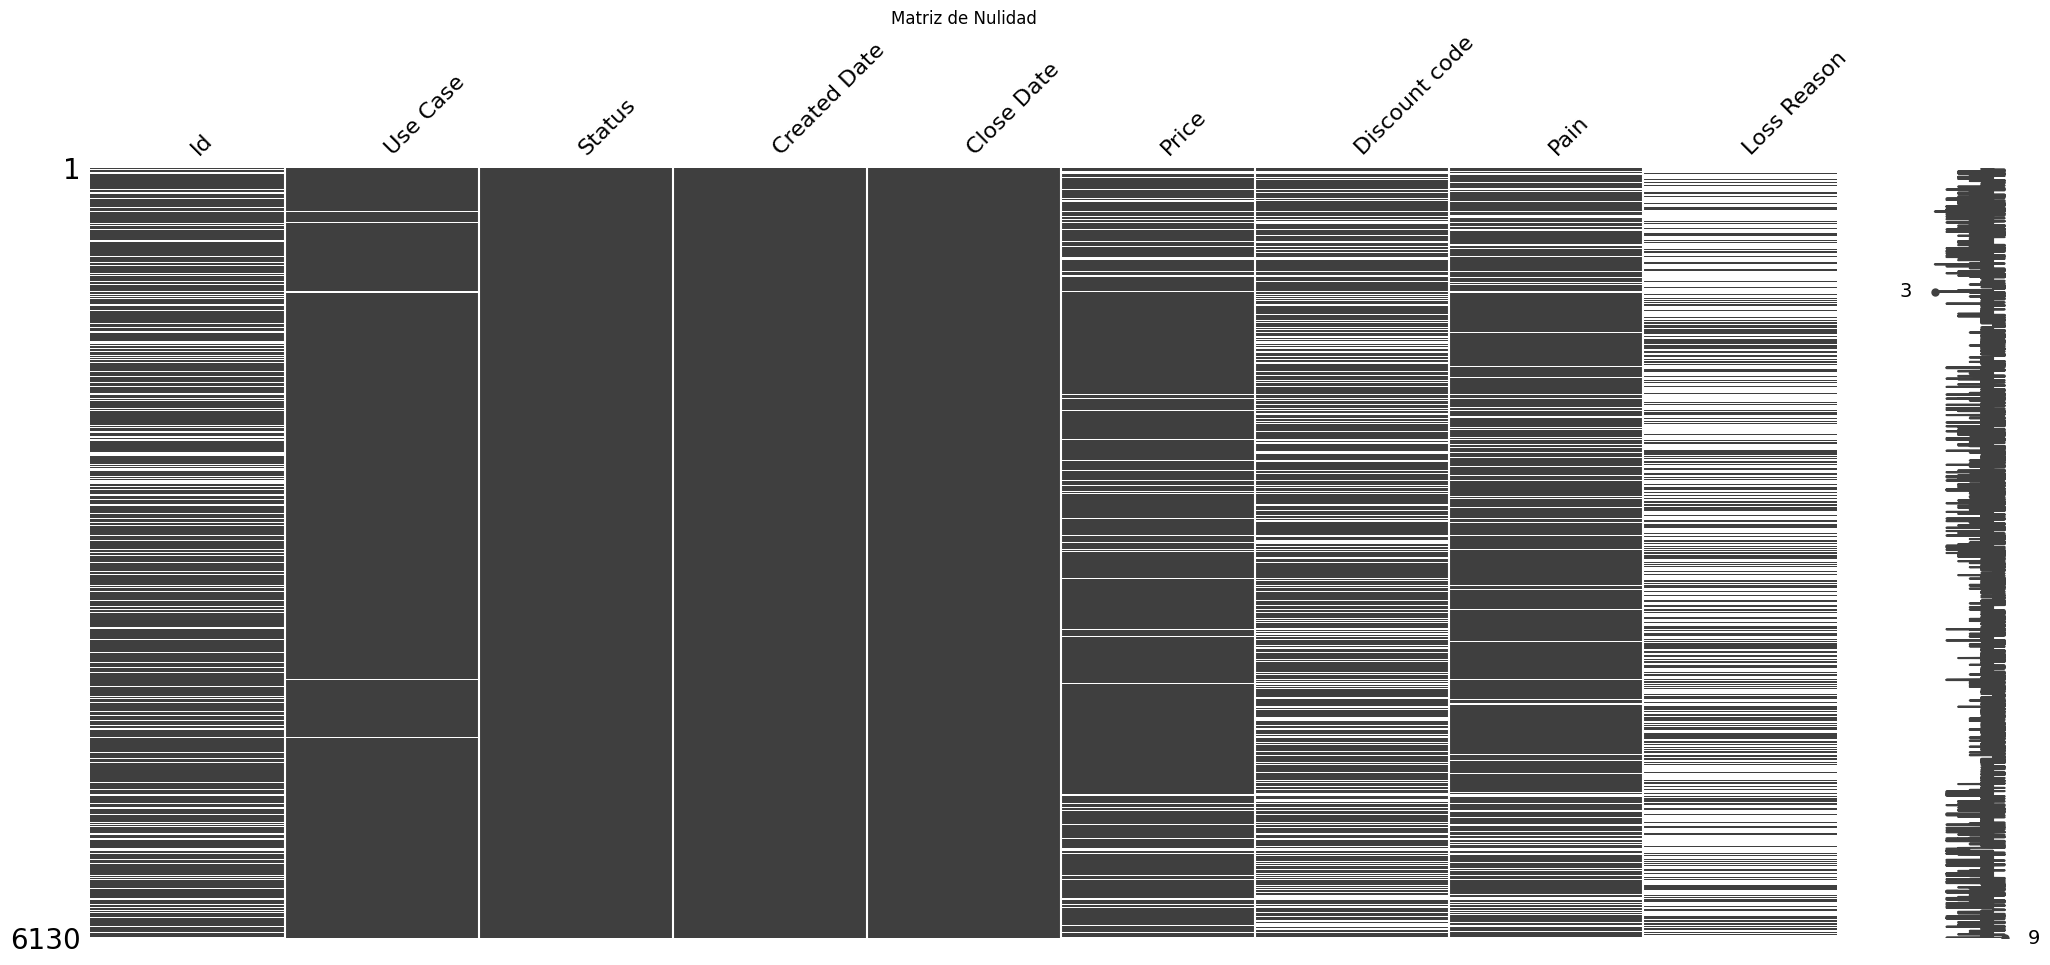

In [3]:
# Visualizar la correlación de nulidad
msno.matrix(data)
plt.title("Matriz de Nulidad")
plt.show()

Grafica mediante mapa de calor

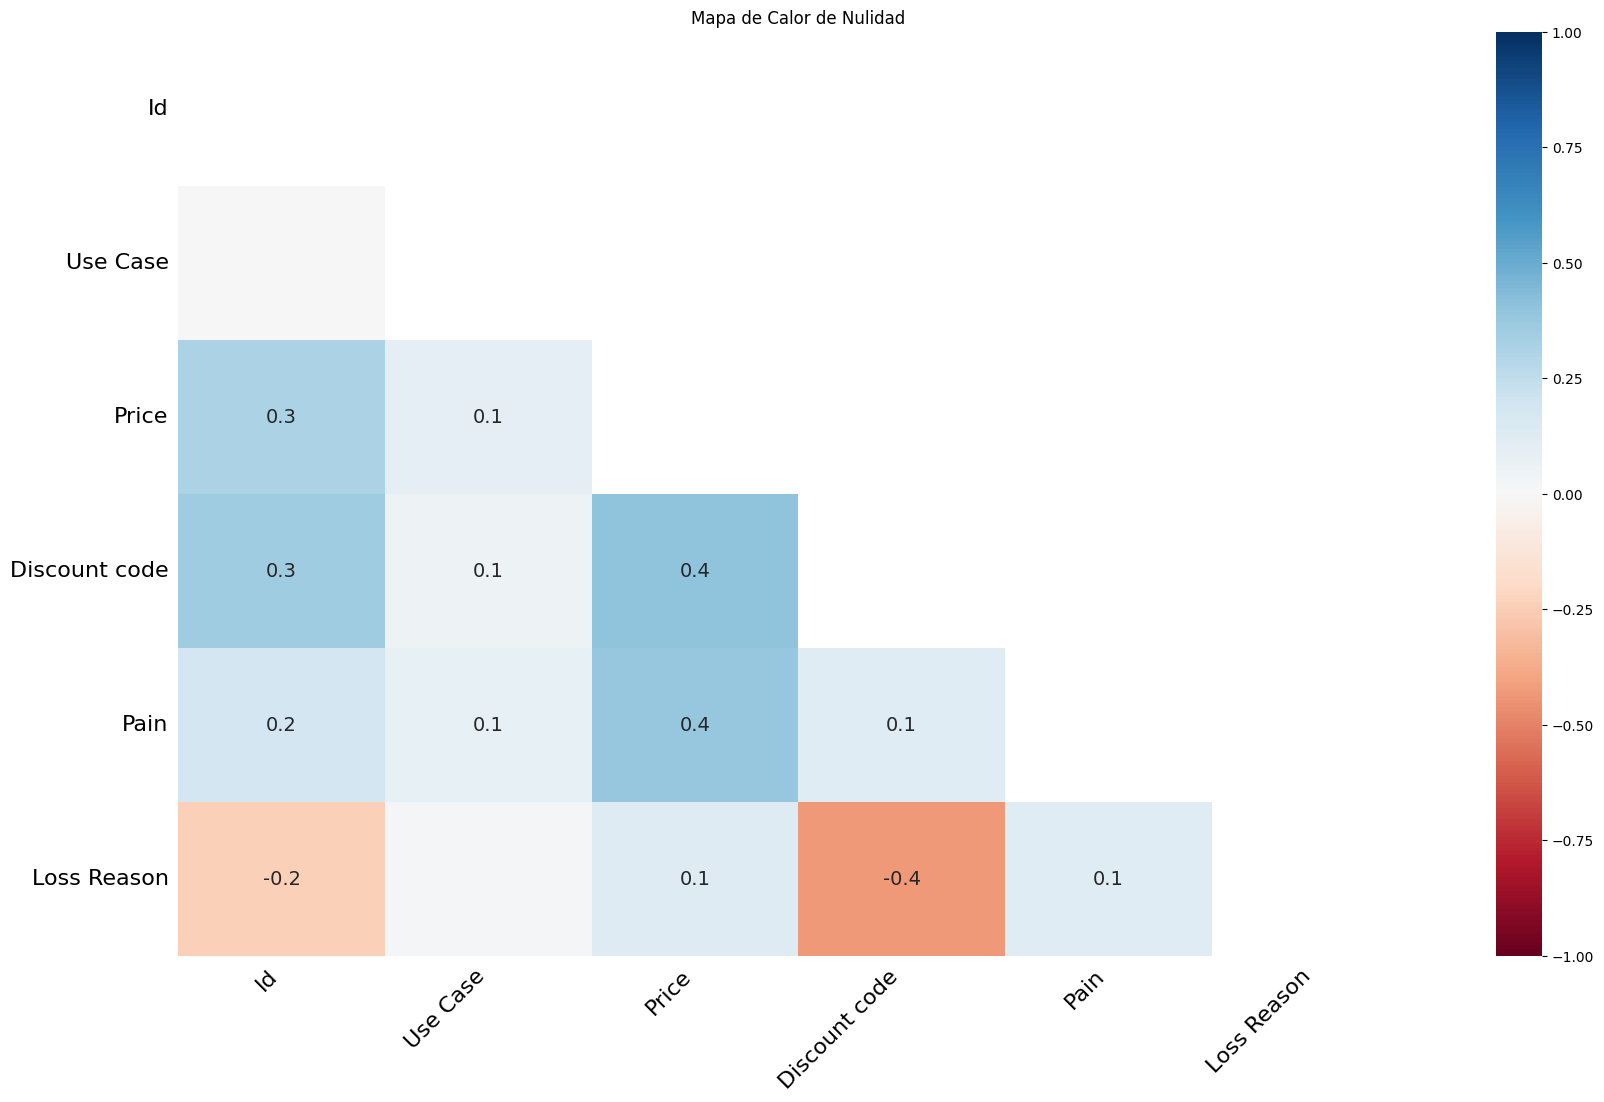

In [4]:
# También puedes usar un mapa de calor para una visualización más detallada
msno.heatmap(data)
plt.title("Mapa de Calor de Nulidad")
plt.show()

Grafica de dispersión con datos faltantes

Text(0.5, 1.0, 'Datos Faltantes')

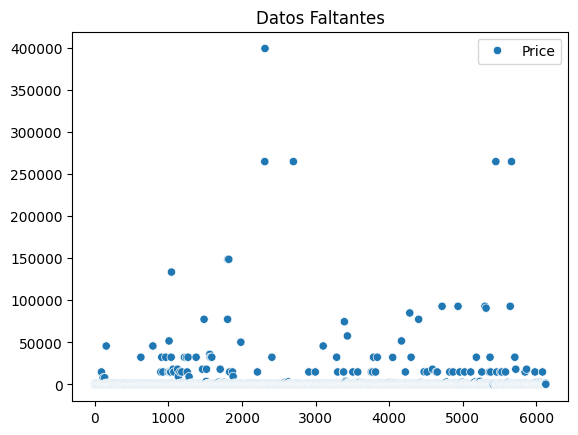

In [5]:
sns.scatterplot(data)
plt.title('Datos Faltantes')

Otra forma de crear un mapa de calor

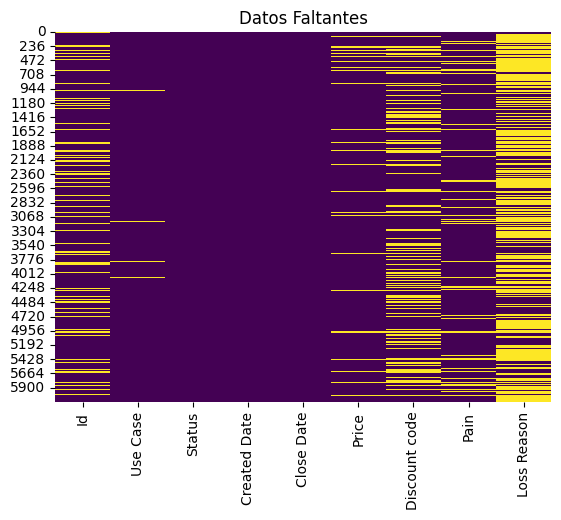

In [6]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Datos Faltantes')
plt.show()

4. Tabular y organizar las columnas con valores faltantes

In [7]:
# Identificar valores faltantes y sumarlos por columna
valores_faltantes = data.isnull().sum()

# Crear un nuevo DataFrame con la información de valores faltantes
data_valores_faltantes = pd.DataFrame({'Columna': valores_faltantes.index, 'Valores Faltantes': valores_faltantes.values})

# Mostrar el DataFrame con la información de valores faltantes
print("\nDataFrame con información de valores faltantes:")
print(data_valores_faltantes)



DataFrame con información de valores faltantes:
         Columna  Valores Faltantes
0             Id               1168
1       Use Case                 37
2         Status                  0
3   Created Date                  0
4     Close Date                  0
5          Price                365
6  Discount code               1699
7           Pain                869
8    Loss Reason               3766


In [8]:
pd.read_csv(
    'C:/Users/WAGNER FERNÁNDEZ/OneDrive - POLICIA NACIONAL DE COLOMBIA/Documents/Ciencia de Datos/PROYECTOS/DETECCION-EXPLORACION-DATOS FALTANTES/raw/offers.csv',
    na_filter=True,
    na_values=[-99, -1]
)

data.head(10)
# sustituye los valores -99 y -1 por nan desde el archivo raiz
# de esta manera pandas detecta que son valores faltantes

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
5,NaN,Corporate Events,Closed Lost,2019-11-19,2019-11-20,360.0,MONTHSAVE25DEAL,financial control,price
6,9pl1etry,Corporate Events,Closed Won,2019-12-18,2019-12-18,768.0,2SEMESTERS20OFF,operations,NaN
7,7tkbogep,Corporate Events,Closed Won,2019-11-18,2019-11-18,300.0,MONTH50CUTBACK,operations,NaN
8,locj094j,Corporate Events,Closed Won,2019-11-18,2019-11-19,300.0,MONTH50CUTBACK,quality of delivery,NaN
9,NaN,Corporate Events,Closed Lost,2019-11-18,2019-11-25,1344.0,YEARLY30PROMO,operations,lost to competitor


5.1. Codificacion de valores faltantes en el dataframe

In [9]:
# Codificar los valores faltantes con un código específico, por ejemplo, -1
data_codificada = data.fillna(-99)

# Mostrar el DataFrame codificado
print("\nDataFrame codificado:")
data_codificada



DataFrame codificado:


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,-99
1,-99,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,-99,operations,price
2,-99,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,-99
4,-99,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
...,...,...,...,...,...,...,...,...,...
6125,-99,Corporate Events,Closed Lost,2019-05-20,2019-05-21,120.0,-99,operations,price
6126,-99,Wedding Planning,Closed Won,2019-05-20,2019-05-20,-99.0,-99,-99,-99
6127,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,-99,operations,no product fit


6. Eliminar datos faltante mediante el metodo pairwise

In [10]:


# Eliminar filas con valores nulos usando pairwise deletion
data_pairwise = data.dropna()

print("DataFrame con pairwise deletion:")
data_pairwise


DataFrame con pairwise deletion:


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
13,xb6toen7,Educational Seminars,Closed Lost,2019-12-10,2019-12-16,1344.0,ANNUAL30BONUS,financial control,no product fit
20,3n4vaopa,Corporate Events,Closed Lost,2019-11-16,2019-11-25,360.0,MONTHSAVE25DEAL,quality of delivery,no response
26,uslx2c8c,Corporate Events,Closed Lost,2019-11-17,2019-11-18,360.0,MONTHSAVE25DEAL,financial control,lost to competitor
37,h493pfxh,Educational Seminars,Closed Lost,2019-11-18,2019-11-18,360.0,25GIFT,financial control,no product fit
47,mhtrpofn,Corporate Events,Closed Lost,2019-11-10,2019-11-10,240.0,DISCOUNT50POWER,financial control,no product fit
...,...,...,...,...,...,...,...,...,...
6053,c7zd1two,Corporate Events,Closed Lost,2019-06-08,2019-06-08,240.0,MONTH50REBATE,operations,no budget
6065,y4l9nc9g,Corporate Events,Closed Lost,2019-02-26,2019-06-28,360.0,TRIALFREE,financial control,price
6069,8fc70eb9,Corporate Events,Closed Lost,2019-03-11,2019-04-25,768.0,2SEMESTERS20OFF,operations,not target
6102,yucfip9f,Corporate Events,Closed Lost,2019-04-20,2019-03-23,200.0,NOCOSTREG,quality of delivery,no response


7. Eliminar datos faltante mediante el metodo listwise

In [11]:

# Eliminar filas con al menos un valor nulo usando listwise deletion
data_listwise = data.dropna(how='any')

print("DataFrame con listwise deletion:")
data_listwise


DataFrame con listwise deletion:


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
13,xb6toen7,Educational Seminars,Closed Lost,2019-12-10,2019-12-16,1344.0,ANNUAL30BONUS,financial control,no product fit
20,3n4vaopa,Corporate Events,Closed Lost,2019-11-16,2019-11-25,360.0,MONTHSAVE25DEAL,quality of delivery,no response
26,uslx2c8c,Corporate Events,Closed Lost,2019-11-17,2019-11-18,360.0,MONTHSAVE25DEAL,financial control,lost to competitor
37,h493pfxh,Educational Seminars,Closed Lost,2019-11-18,2019-11-18,360.0,25GIFT,financial control,no product fit
47,mhtrpofn,Corporate Events,Closed Lost,2019-11-10,2019-11-10,240.0,DISCOUNT50POWER,financial control,no product fit
...,...,...,...,...,...,...,...,...,...
6053,c7zd1two,Corporate Events,Closed Lost,2019-06-08,2019-06-08,240.0,MONTH50REBATE,operations,no budget
6065,y4l9nc9g,Corporate Events,Closed Lost,2019-02-26,2019-06-28,360.0,TRIALFREE,financial control,price
6069,8fc70eb9,Corporate Events,Closed Lost,2019-03-11,2019-04-25,768.0,2SEMESTERS20OFF,operations,not target
6102,yucfip9f,Corporate Events,Closed Lost,2019-04-20,2019-03-23,200.0,NOCOSTREG,quality of delivery,no response


8. Matriz de nulidad

In [12]:

# Exponer filas faltantes implícitas de manera explícita
rows_with_missing_values = data[data.isnull().any(axis=1)]

print("Filas con valores faltantes implícitos:")
rows_with_missing_values

Filas con valores faltantes implícitos:


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
...,...,...,...,...,...,...,...,...,...
6124,ut9flvo3,Corporate Events,Closed Won,2019-05-20,2019-05-20,150.0,QUARTERLY75OFF,operations,NaN
6125,NaN,Corporate Events,Closed Lost,2019-05-20,2019-05-21,120.0,NaN,operations,price
6126,NaN,Wedding Planning,Closed Won,2019-05-20,2019-05-20,NaN,NaN,NaN,NaN
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,NaN,operations,no product fit


9. Conversión de valores faltantes implícitos en explícitos

In [13]:
# 1. Asignación de un Valor Predeterminado
data['Id'] = data['Id'].fillna(0)

# 2. Interpolación
data['Discount code'] = data['Discount code'].interpolate()

# 3. Eliminación de Filas o Columnas con Valores Faltantes
data = data.dropna()

# 4. Uso de Marcadores Especiales
data = data.fillna('NA')

data

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_10232\818427764.py:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data['Discount code'] = data['Discount code'].interpolate()


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
2,0,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
4,0,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
5,0,Corporate Events,Closed Lost,2019-11-19,2019-11-20,360.0,MONTHSAVE25DEAL,financial control,price
9,0,Corporate Events,Closed Lost,2019-11-18,2019-11-25,1344.0,YEARLY30PROMO,operations,lost to competitor
13,xb6toen7,Educational Seminars,Closed Lost,2019-12-10,2019-12-16,1344.0,ANNUAL30BONUS,financial control,no product fit
...,...,...,...,...,...,...,...,...,...
6059,0,Corporate Events,Closed Lost,2019-06-08,2019-06-25,200.0,ECONOMY50GIFT,operations,no response
6065,y4l9nc9g,Corporate Events,Closed Lost,2019-02-26,2019-06-28,360.0,TRIALFREE,financial control,price
6069,8fc70eb9,Corporate Events,Closed Lost,2019-03-11,2019-04-25,768.0,2SEMESTERS20OFF,operations,not target
6102,yucfip9f,Corporate Events,Closed Lost,2019-04-20,2019-03-23,200.0,NOCOSTREG,quality of delivery,no response
